[20, 17.860207490636704, 15.924231739473925, 14.211048634743644, 12.72285652762591, 11.447420552274226, 10.362954198311417, 9.443394548257528, 8.662501415462499, 7.996295116425594, 7.424101312987429, 6.928708701840124, 6.496075677935123, 6.1148677087708565, 5.775975992507309, 5.472084163117063, 5.197304397696705, 4.946882841681776, 4.716965801077767, 4.504415986202281, 4.306668644711891, 4.121618927805148, 3.947533495329258, 3.7829808656890025, 3.626776260166348, 3.4779376785050835, 3.3356507078766975, 3.199240152833025, 3.0681470187783413, 2.9419097186327474, 2.8201486277158687, 2.702553305517136, 2.5888718501761865, 2.478901963663289, 2.3724833914683625, 2.2694914665965906, 2.169831538779115, 2.0734341098422493, 1.9802505281080713, 1.8902491208862409, 1.8034116664730506, 1.7197301271517393, 1.6392035837181005, 1.5618353309294637, 1.4876301124894622, 1.4165914937526587, 1.348719389720651, 1.2840077839712563, 1.222442689250946, 1.1640004105724746, 1.1086461748186323, 1.0563331855711884

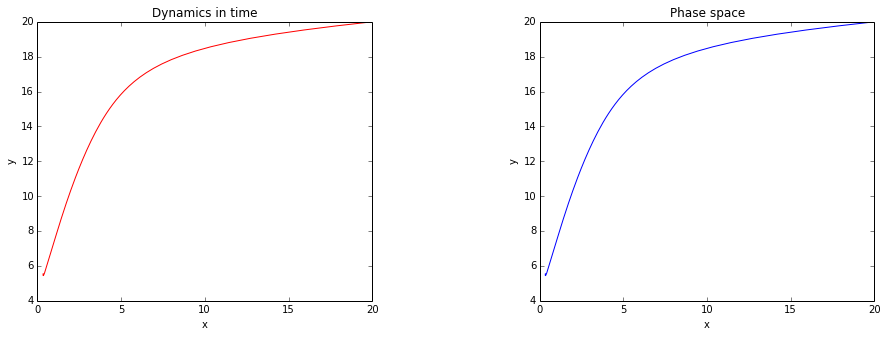

In [26]:
# import necessary libraries
import matplotlib.pyplot as plt
# show plots in notebook
% matplotlib inline

# define system in terms of separated differential equations
def f(x,y):
    return -((17.38 + 869*x**2)/(1 + x**2 + y**2) - 11*x)
def g(x,y):
    return -((.869 + 43.45*x**2)/(1 + x**2) - y)

# initialize lists containing values
x = []
y = []

#iv1, iv2 = initial values, dt = timestep, time = range
def sys(iv1, iv2, dt, time):
    # initial values:
    x.append(iv1)
    y.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        x.append(x[i] + (f(x[i],y[i])) * dt)
        y.append(y[i] + (g(x[i],y[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return x, y

sys(20, 20, 0.01, 140)

print(x)
print(y)
#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, y, 'r-')
# ax1.plot(y, x 'b-', label='prey')
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
# ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
# ax2.grid()

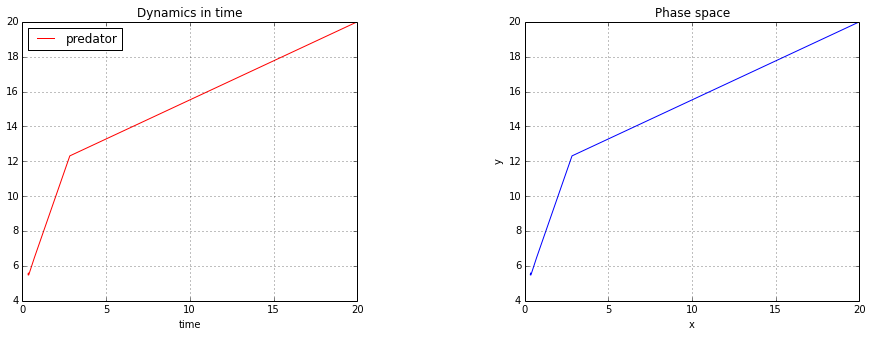

In [9]:
import numpy as np
from scipy import integrate

# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array([-((17.38*(1 + 50*X[0]**2))/(1 + X[0]**2 + X[1]**2) - 11*X[0]) , -((11*1.58*.05*(1 + 50*X[0]**2))/(1 + X[0]**2) - X[1])])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 120,  400)
# initial values: x0 = 10, y0 = 2
Sys0 = np.array([20, 20])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, y, 'r-', label='predator')
# ax1.plot(y, 'b-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

In [14]:
# brute force: iterate through possibility space (r)
fp = []

def find_fixed_points(r):
    for x in range(r):
        for y in range(r):
            if ((f(x,y) == 0) and (g(x,y) == 0)):
                fp.append((x,y))
                print('The system has a fixed point in %s,%s' % (x,y))
    return fp

find_fixed_points(10)

[]

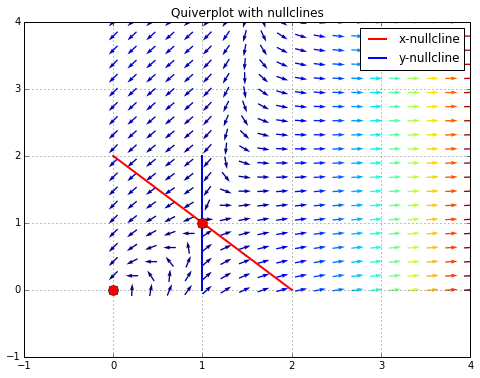

In [26]:
#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)

x = np.linspace(0,4,20)
y = np.arange(0,4,20)

# plot nullclines
ax4.plot([0,2],[2,0], 'r-', lw=2, label='x-nullcline')
ax4.plot([1,1],[0,2], 'b-', lw=2, label='y-nullcline')
plt.xlim([-1,4])
plt.ylim([-1,4])

# plot fixed points
for point in fp:
    ax4.plot(point[0],point[1],"red", marker = "o", markersize = 10.0)
ax4.set_title("Quiverplot with nullclines")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, 4, 20)
y = np.linspace(0, 4, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Sys([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.legend()
ax4.grid()

In [15]:
# needed to calculate (complex) squareroots of negative numbers
from scipy import sqrt

def eigenvalues(x,y):
    # x**3 - y
    a11 = 3*x**2                # differentiated with respect to x
    a12 = - 1                        # differentiated with respect to y
    # x - y
    a21 = 1                          # differentiated with respect to x
    a22 = -1                    # differentiated with respect to y

    tr = a11 + a22
    det = a11*a22 - a12*a21
    lambda1 = (tr - sqrt(tr**2 - 4*det))/2
    lambda2 = (tr + sqrt(tr**2 - 4*det))/2
    print('Check the fixed point  %s, %s' % (x,y)) 
    print('The real part of the first eigenvalue is %s' %lambda1.real)
    print('The real part of the second eigenvalue is %s' % lambda2.real)    
    
    if (lambda1.real < 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a sink. It is stable' % (x,y))
    if (lambda1.real > 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is a source. It is unstable' % (x,y))
    if (lambda1.real > 0 and lambda2.real < 0):
        print('The fixed point in %s, %s is a saddle. It is unstable' % (x,y))
    if (lambda1.real < 0 and lambda2.real > 0):
        print('The fixed point in %s, %s is unstable' % (x,y))
    print '----------------------------'
    return lambda1 , lambda2

# iterate through list of fixed points
for x,y in fp:
    eigenvalues(x,y)

Check the fixed point  0, 0
The real part of the first eigenvalue is -0.5
The real part of the second eigenvalue is -0.5
The fixed point in 0, 0 is a sink. It is stable
----------------------------
Check the fixed point  1, 1
The real part of the first eigenvalue is -0.732050807569
The real part of the second eigenvalue is 2.73205080757
The fixed point in 1, 1 is unstable
----------------------------


Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.


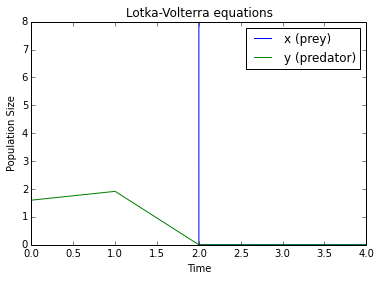

In [20]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
# show plots in notebook
% matplotlib inline
def LotkaVolterra(state,t):
  x = state[0]
  y = state[1]
  xd = x**3 - y
  yd = x - y
  return [xd,yd]

t = np.arange(0,5,1)
state0 = [1.6,1.6]
state = odeint(LotkaVolterra,state0,t)
plt.figure()
plt.plot(t,state)
plt.ylim([0,8])
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(('x (prey)','y (predator)'))
plt.title('Lotka-Volterra equations')

/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: overflow encountered in double_scalars
/Library/Python/2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in double_scalars


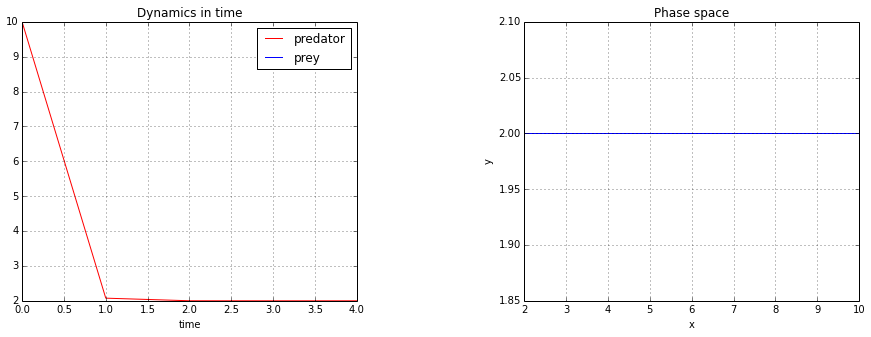

In [27]:
import numpy as np
from scipy import integrate

# define system in terms of a Numpy array
def Sys(X, t=0):
    # here X[0] = x and x[1] = y    
    return np.array(2*X[0]**5/(1+X[0]**5) + 2/(1 + X[1]**5) - X[0], 2*X[1]**5/(1+X[1]**5) + 2/(1 + X[0]**5) - X[1])

# generate 1000 linearly spaced numbers for x-axes
t = np.linspace(0, 20,  5)
# initial values: x0 = 10, y0 = 2
Sys0 = np.array([10, 2])

# type "help(integrate.odeint)" if you want more information about integrate.odeint inputs and outputs.
X, infodict = integrate.odeint(Sys, Sys0, t, full_output=True)
# infodict['message']                      # integration successful

x,y = X.T

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x,'r-', label='predator')
ax1.plot(y, 'b-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

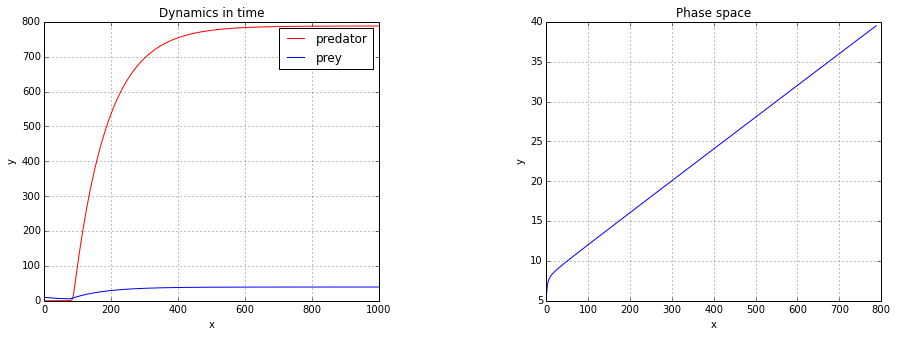

In [36]:
# import necessary libraries
import matplotlib.pyplot as plt
# show plots in notebook
% matplotlib inline

# define system in terms of separated differential equations
def f(x,y):
    return 10*1.58*((1+50*x**2)/(1+x**2+y**2)) - x
def g(x,y):
    return 10*0.079*((1+50*x**2)/(1+x**2)) - y

# initialize lists containing values
x = []
y = []

#iv1, iv2 = initial values, dt = timestep, time = range
def sys(iv1, iv2, dt, time):
    # initial values:
    x.append(iv1)
    y.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        x.append(x[i] + (f(x[i],y[i])) * dt)
        y.append(y[i] + (g(x[i],y[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return x, y

sys(0, 10, 0.01, 1000)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x,'r-', label='predator')
ax1.plot(y,'b-', label='prey')
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.set_ylabel("")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()

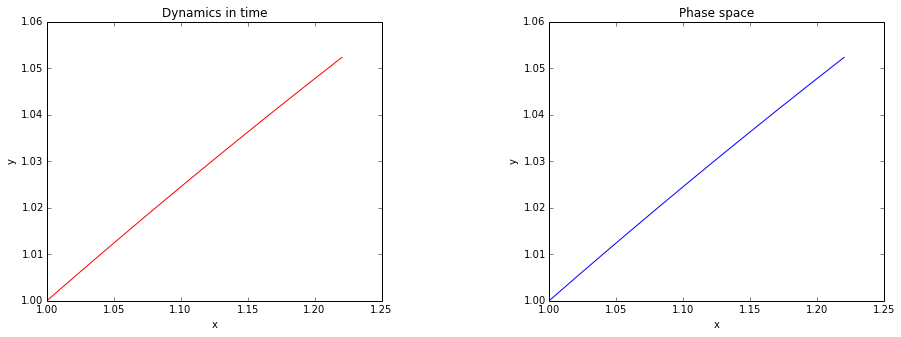

In [25]:
# import necessary libraries
import matplotlib.pyplot as plt
# show plots in notebook
% matplotlib inline

# define system in terms of separated differential equations
def f(x,y):
    return 1 + 0.5*((x**2)/1+x**2)
def g(x,y):
    return 0.5*y**2

# initialize lists containing values
x = []
y = []

#iv1, iv2 = initial values, dt = timestep, time = range
def sys(iv1,iv2, dt, time):
    # initial values:
    x.append(iv1)
    y.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        x.append(x[i] + (f(x[i],y[i])) * dt)
        y.append(y[i] + (g(x[i],y[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return x,y

sys(1, 1, 0.01, 10)

# print(x)
# print(y)
#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x,y,'r-')
# ax1.plot(t, y,'b-', label='prey')
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
# ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")